In [1]:
import pandas as pd 
import numpy as np
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
discrete_var=[features for features in df.columns if len(df[features].unique())<10 and features not in ['target']]
discrete_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [3]:
X1=df[discrete_var]
X1.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [4]:
Y1=df['target'].copy()
Y1.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
from sklearn.feature_selection import chi2
chitest=chi2(X1,Y1)
chitest

(array([ 7.57683451, 62.59809791,  0.20293368,  2.97827075, 38.91437697,
         9.8040952 , 66.44076512,  5.79185297]),
 array([5.91231763e-03, 2.53498179e-15, 6.52363208e-01, 8.43893904e-02,
        4.42807388e-10, 1.74123685e-03, 3.60567663e-16, 1.61006098e-02]))

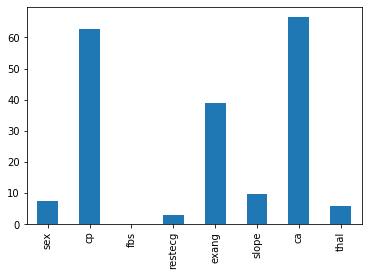

In [6]:
features_score=pd.Series(chitest[0])
features_score.index=X1.columns
features_score.plot.bar()

-0.3617314488407654


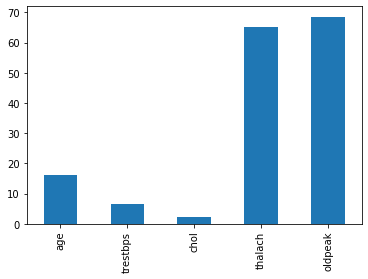

In [27]:
continuous_feature=[features for features in df.columns if features not in discrete_var + ['target']]
X2=df[continuous_feature]
Y2=df['target']
from sklearn.feature_selection import f_classif
anv=f_classif(X2,Y2)
scores_anv=pd.Series(anv[0])
scores_anv.index=X2.columns
scores_anv.plot.bar()
from scipy.stats import kendalltau
tau,p_value=kendalltau(X2['oldpeak'],Y2)
print(tau)

In [8]:
X=df.drop(['target'],axis=1)
Y=df['target']
from sklearn.feature_selection import mutual_info_classif
clf=mutual_info_classif(X,Y)
clf

array([0.        , 0.02418167, 0.15866454, 0.        , 0.07394257,
       0.        , 0.00201987, 0.06586402, 0.10799281, 0.09399343,
       0.05179387, 0.10689967, 0.16562467])

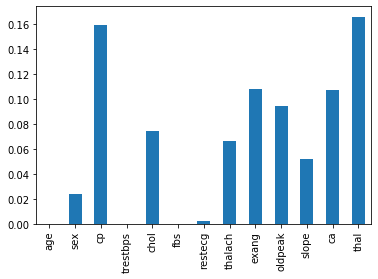

In [9]:
features_score=pd.Series(clf)
features_score.index=X.columns
features_score.plot.bar()